In [410]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
%store -r api_key

# Create json from API request for league identification information

league_info_url = 'http://api.sportradar.us/nba/trial/v5/en/league/hierarchy.json?api_key=vxpszhvmgbbca574t8ue9akt'

data = requests.get(league_info_url)

json_league_info = data.json()

json_league_info          

{'league': {'id': '4353138d-4c22-4396-95d8-5f587d2df25c',
  'name': 'NBA',
  'alias': 'NBA'},
 'conferences': [{'id': '3960cfac-7361-4b30-bc25-8d393de6f62f',
   'name': 'EASTERN CONFERENCE',
   'alias': 'EASTERN',
   'divisions': [{'id': '54dc7348-c1d2-40d8-88b3-c4c0138e085d',
     'name': 'Southeast',
     'alias': 'SOUTHEAST',
     'teams': [{'id': '583ec8d4-fb46-11e1-82cb-f4ce4684ea4c',
       'name': 'Wizards',
       'market': 'Washington',
       'alias': 'WAS',
       'sr_id': 'sr:team:3431',
       'reference': '1610612764',
       'venue': {'id': 'f62d5b49-d646-56e9-ba60-a875a00830f8',
        'name': 'Capital One Arena',
        'capacity': 20356,
        'address': '601 F Street NW',
        'city': 'Washington',
        'state': 'DC',
        'zip': '20004',
        'country': 'USA'}},
      {'id': '583ec97e-fb46-11e1-82cb-f4ce4684ea4c',
       'name': 'Hornets',
       'market': 'Charlotte',
       'alias': 'CHA',
       'sr_id': 'sr:team:3430',
       'reference': '161061

In [3]:
# Create dictionary of every team name and its id

team_ids = {}

for conference in json_league_info['conferences']:
    for division in conference['divisions']:
        for team in division['teams']:
            team_ids[team['name']] = team['id']
            
team_ids

{'Wizards': '583ec8d4-fb46-11e1-82cb-f4ce4684ea4c',
 'Hornets': '583ec97e-fb46-11e1-82cb-f4ce4684ea4c',
 'Hawks': '583ecb8f-fb46-11e1-82cb-f4ce4684ea4c',
 'Heat': '583ecea6-fb46-11e1-82cb-f4ce4684ea4c',
 'Magic': '583ed157-fb46-11e1-82cb-f4ce4684ea4c',
 'Knicks': '583ec70e-fb46-11e1-82cb-f4ce4684ea4c',
 '76ers': '583ec87d-fb46-11e1-82cb-f4ce4684ea4c',
 'Nets': '583ec9d6-fb46-11e1-82cb-f4ce4684ea4c',
 'Celtics': '583eccfa-fb46-11e1-82cb-f4ce4684ea4c',
 'Raptors': '583ecda6-fb46-11e1-82cb-f4ce4684ea4c',
 'Bulls': '583ec5fd-fb46-11e1-82cb-f4ce4684ea4c',
 'Cavaliers': '583ec773-fb46-11e1-82cb-f4ce4684ea4c',
 'Pacers': '583ec7cd-fb46-11e1-82cb-f4ce4684ea4c',
 'Pistons': '583ec928-fb46-11e1-82cb-f4ce4684ea4c',
 'Bucks': '583ecefd-fb46-11e1-82cb-f4ce4684ea4c',
 'Timberwolves': '583eca2f-fb46-11e1-82cb-f4ce4684ea4c',
 'Jazz': '583ece50-fb46-11e1-82cb-f4ce4684ea4c',
 'Thunder': '583ecfff-fb46-11e1-82cb-f4ce4684ea4c',
 'Trail Blazers': '583ed056-fb46-11e1-82cb-f4ce4684ea4c',
 'Nuggets': '583ed10

In [ ]:
team_info_url = 'http://api.sportradar.us/nba/trial/v5/en/teams/583ed056-fb46-11e1-82cb-f4ce4684ea4c/profile.json?api_key=vxpszhvmgbbca574t8ue9akt'

json_team_info = requests.get(team_info_url).json()

json_normalize(json_team_info, 'players')

In [135]:
# Define a function for creating a dictionary of the names and player ids for a particular team

for team_id in team_ids.values():
    
    team_info_url = 
    'http://api.sportradar.us/nba/trial/v5/en/teams/{}/profile.json?api_key=vxpszhvmgbbca574t8ue9akt'.format()

    data = requests.get(team_info_url)

    json_league_info = data.json()
    
    player_ids = {}
    
    for player in json_league_info['players']:
        
        player_ids[player['full_name']] = player['id']

{'Gerald Green': '11da94f7-02c0-4bc9-9da3-8e8994f46fb6',
 'Michael Carter-Williams': '1f5e7dfc-225d-4a25-8857-e6f8192b4c44',
 'Gary Clark': '2c0b750c-91a2-4e1d-8387-47c4944104e8',
 'Carmelo Anthony': '32688af1-7ac2-432e-b60a-74b9bd89df57',
 'Isaiah Hartenstein': '38745a56-7472-4844-a2dc-f61d3bcd941f',
 'James Ennis III': '4cbe58e4-5e4b-46b0-9f7b-6cf18ad002c6',
 'Marquese Chriss': '643ac9e3-9e95-4611-b5ac-8a5416046ec5',
 'Chris Paul': '942c53e3-7268-44e3-b0a9-fdff55a72c03',
 'James Harden': 'a52b2c84-9c3d-4d6e-8a3b-10e75d11c2bc',
 'Clint Capela': 'c37dafbb-a269-41f6-813f-bdb4da388203',
 'Zhou Qi': 'cf0a7464-a44e-47c5-83e1-4402ea16fc33',
 'P.J. Tucker': 'da7d17aa-f245-4710-820c-99d29a7458b4',
 'Vincent Edwards': 'e52274ff-0d12-47f1-b830-d0fe5718cc64',
 'Nene': 'f1b776e4-b59e-48c7-9e8a-272de4946b37',
 'Brandon Knight': 'f58a9803-0ede-4c0b-acbd-08bc0da229af',
 'Eric Gordon': 'f8d6c74c-e0bd-41ed-a814-f0b25259fe0a'}

In [165]:
seasonal_stats_url = 'http://api.sportradar.us/nba/trial/v5/en/seasons/2018/REG/teams/583ec825-fb46-11e1-82cb-f4ce4684ea4c/statistics.json?api_key=vxpszhvmgbbca574t8ue9akt'

data = requests.get(seasonal_stats_url)

data.json()


{'id': '583ec825-fb46-11e1-82cb-f4ce4684ea4c',
 'name': 'Warriors',
 'market': 'Golden State',
 'sr_id': 'sr:team:3428',
 'reference': '1610612744',
 'season': {'id': '47c9979e-5c3f-453d-ac75-734d17412e3f',
  'year': 2018,
  'type': 'REG'},
 'own_record': {'total': {'games_played': 22,
   'minutes': 5305.0,
   'field_goals_made': 950,
   'field_goals_att': 1922,
   'field_goals_pct': 0.494,
   'two_points_made': 698,
   'two_points_att': 1268,
   'two_points_pct': 0.55,
   'three_points_made': 252,
   'three_points_att': 654,
   'three_points_pct': 0.385,
   'blocked_att': 80,
   'free_throws_made': 399,
   'free_throws_att': 487,
   'free_throws_pct': 0.819,
   'offensive_rebounds': 213,
   'defensive_rebounds': 794,
   'rebounds': 1007,
   'assists': 613,
   'turnovers': 328,
   'assists_turnover_ratio': 1.87,
   'steals': 160,
   'blocks': 140,
   'personal_fouls': 495,
   'tech_fouls': 15,
   'points': 2551,
   'fast_break_pts': 377,
   'flagrant_fouls': 0,
   'points_off_turnovers

In [140]:
seasonal_stats_info = data.json()

seasonal_stats_info.keys()

dict_keys(['id', 'name', 'market', 'sr_id', 'reference', 'season', 'own_record', 'opponents', 'players'])

In [149]:
df = json_normalize(seasonal_stats_info['players']).set_index('full_name')
df

,average.assists,average.blocked_att,average.blocks,average.def_rebounds,average.efficiency,average.fast_break_att,average.fast_break_made,average.fast_break_pts,average.field_goals_att,average.field_goals_made,...,total.three_points_att,total.three_points_made,total.three_points_pct,total.triple_doubles,total.true_shooting_att,total.true_shooting_pct,total.turnovers,total.two_points_att,total.two_points_made,total.two_points_pct
full_name,,,,,,,,,,,,,,,,,,,,,
Damion Lee,0.2,0.33,0.00,2.00,5.33,1.22,0.33,0.89,4.22,1.78,...,21,10,0.476,0,42.40,0.590,4,17,6,0.353
Jordan Bell,1.2,0.05,0.85,1.95,6.35,0.15,0.15,0.30,1.65,0.95,...,1,0,0.000,0,40.48,0.618,7,32,19,0.594
Damian Jones,1.2,0.43,1.14,1.86,9.52,0.19,0.14,0.29,3.05,2.24,...,0,0,0.000,0,78.52,0.732,14,64,47,0.734
Klay Thompson,1.8,0.38,0.57,3.29,16.33,2.62,1.33,3.24,19.76,9.00,...,166,56,0.337,0,437.44,0.542,42,249,133,0.534
Kevin Durant,6.0,0.57,1.10,7.43,30.57,2.86,1.57,4.29,19.52,9.95,...,86,27,0.314,1,480.40,0.617,71,324,182,0.562
Jonas Jerebko,1.6,0.29,0.14,4.05,10.43,0.81,0.43,1.19,5.10,2.24,...,57,20,0.351,0,118.44,0.574,15,50,27,0.540
Draymond Green,7.2,0.46,0.77,6.69,17.08,0.77,0.62,1.46,6.23,2.77,...,27,6,0.222,0,88.92,0.506,43,54,30,0.556
Shaun Livingston,1.8,0.08,0.50,1.17,7.25,0.42,0.17,0.42,4.75,2.25,...,0,0,0.000,0,62.72,0.518,7,57,27,0.474
Stephen Curry,6.1,0.50,0.33,4.50,29.00,3.58,1.92,5.42,19.75,10.17,...,126,62,0.492,0,259.88,0.681,36,111,60,0.541


# DATA WRANGLING

In [5]:
# Get list of all game ids from 2013 to 2017

years = [2013,2014,2015,2016,2017]

game_ids = {}

for year in years:

    schedule_url = 'http://api.sportradar.us/nba/trial/v5/en/games/{}/REG/schedule.json?api_key=vxpszhvmgbbca574t8ue9akt'.format(year)

    schedule = requests.get(schedule_url).json()
    
    for game in schedule['games']:
        
        game_ids[game['id']] = year
        
    time.sleep(5)
    
game_ids

{'0b3d21c7-c13f-4ee8-8d9d-4f334754c7e4': 2013,
 '37d2a614-7e44-4eda-b215-8ec2a3741c52': 2013,
 '431c501b-4abd-4642-9f0b-991b9d4dbb97': 2013,
 '03dbfb30-39d5-4181-9f4e-fce92b5ff28c': 2013,
 '12132022-dc23-4ea8-bf5b-38f6c58042db': 2013,
 '49633db0-9955-4b2e-8c40-63b6c2081c39': 2013,
 '41791677-b4a9-436f-999e-b8864c987b3b': 2013,
 '656ffb5a-fc68-425e-82bb-c9b4b6d0a723': 2013,
 '1a7c6608-8e3b-413a-917b-4f3fda75cd62': 2013,
 '43376c4f-0258-407d-b7d9-f9b60ba36911': 2013,
 'c5331896-d0d1-4323-a739-49751da044aa': 2013,
 '8afde0b8-d47e-439c-a50d-6fe79de79d7f': 2013,
 '9bafcd63-bdbe-4f26-ae08-05a031ea7491': 2013,
 '05abdc15-af8f-4c64-aa6c-6ca0bb8d1d8a': 2013,
 '4385a98a-ed91-493a-ac8c-55e2a0a7c4a2': 2013,
 'bdfcd7c2-7376-49bf-934e-7eafb579afb5': 2013,
 'e1dcf692-330d-46d3-8add-a241b388fbe2': 2013,
 'd9385d27-daa7-4d47-a685-1fb41949a85e': 2013,
 '095b4041-431c-4824-b11b-01b075bb036f': 2013,
 '5ceecbdf-83e1-49ea-af7a-d527590a37b2': 2013,
 '9ee3f630-3895-45fa-81c0-cb837d204df0': 2013,
 'cca55e65-81

In [164]:
# Initialize game summary statistics DataFrame with first game id in game_ids dictionary

game_summary_url = 'http://api.sportradar.us/nba/trial/v5/en/games/{}/summary.json?api_key=vxpszhvmgbbca574t8ue9akt'.format(list(game_ids.keys())[0])
game_data = requests.get(game_summary_url)

game_data_json = game_data.json()
game_data_json = json_normalize(game_data_json, errors='ignore')
df_all_games = pd.DataFrame.from_dict(game_data_json, orient='columns')
df_all_games


In [217]:
# Starting with the second game in game_ids dictionary, add all game summary data to DataFrame

for game in list(game_ids.keys())[1:]:
    
    game_summary_url = 'http://api.sportradar.us/nba/trial/v5/en/games/{}/summary.json?api_key=vxpszhvmgbbca574t8ue9akt'.format(game)
    game_data = requests.get(game_summary_url)
    
    try:
        game_data_json = game_data.json()
        game_data_json = json.loads(json.dumps(game_data_json).replace("null", '0'))
        game_data_json = json_normalize(game_data_json, errors='ignore')
    
        df_game = pd.DataFrame.from_dict(game_data_json, orient='columns')
        df_all_games = pd.concat([df_all_games, df_game], ignore_index=True, sort=True)
        
    except Exception as e:
        print(game)
        print(game_data)
        print(e)
        break
        

    time.sleep(1)    

# DATA CLEANING

In [400]:
# Choose relevant columns of df_all_games to keep for analysis

cols_keep = ['id', 'away.points', 'away.rank', 'home.points','home.rank']
cols_home = [col for col in df_all_games.columns if col.startswith('home.statistics')]
cols_away = [col for col in df_all_games.columns if col.startswith('away.statistics')]

cols_keep.extend(cols_home)
cols_keep.extend(cols_away)

df_all_games_new = df_all_games[cols_keep]
pd.set_option('display.max_columns', 200)
df_all_games_new.head()



,id,away.points,away.rank,home.points,home.rank,home.statistics.assists,home.statistics.assists_turnover_ratio,home.statistics.bench_points,home.statistics.biggest_lead,home.statistics.blocked_att,home.statistics.blocks,home.statistics.coach_ejections,home.statistics.coach_tech_fouls,home.statistics.defensive_points_per_possession,home.statistics.defensive_rating,home.statistics.defensive_rebounds,home.statistics.effective_fg_pct,home.statistics.efficiency,home.statistics.efficiency_game_score,home.statistics.ejections,home.statistics.fast_break_att,home.statistics.fast_break_made,home.statistics.fast_break_pct,home.statistics.fast_break_pts,home.statistics.field_goals_att,home.statistics.field_goals_made,home.statistics.field_goals_pct,home.statistics.flagrant_fouls,home.statistics.foulouts,home.statistics.fouls_drawn,home.statistics.free_throws_att,home.statistics.free_throws_made,home.statistics.free_throws_pct,home.statistics.minutes,home.statistics.most_unanswered.opp_score,home.statistics.most_unanswered.own_score,home.statistics.most_unanswered.points,home.statistics.offensive_fouls,home.statistics.offensive_points_per_possession,home.statistics.offensive_rating,home.statistics.offensive_rebounds,home.statistics.opponent_possessions,home.statistics.periods,home.statistics.personal_fouls,home.statistics.player_tech_fouls,home.statistics.pls_min,home.statistics.points,home.statistics.points_against,home.statistics.points_in_paint,home.statistics.points_in_paint_att,home.statistics.points_in_paint_made,home.statistics.points_in_paint_pct,home.statistics.points_off_turnovers,home.statistics.possessions,home.statistics.rebounds,home.statistics.second_chance_att,home.statistics.second_chance_made,home.statistics.second_chance_pct,home.statistics.second_chance_pts,home.statistics.steals,home.statistics.team_defensive_rebounds,home.statistics.team_fouls,home.statistics.team_offensive_rebounds,home.statistics.team_rebounds,home.statistics.team_tech_fouls,home.statistics.team_turnovers,home.statistics.three_points_att,home.statistics.three_points_made,home.statistics.three_points_pct,home.statistics.time_leading,home.statistics.total_fouls,home.statistics.total_rebounds,home.statistics.true_shooting_att,home.statistics.true_shooting_pct,home.statistics.turnovers,home.statistics.two_points_att,home.statistics.two_points_made,home.statistics.two_points_pct,away.statistics.assists,away.statistics.assists_turnover_ratio,away.statistics.bench_points,away.statistics.biggest_lead,away.statistics.blocked_att,away.statistics.blocks,away.statistics.coach_ejections,away.statistics.coach_tech_fouls,away.statistics.defensive_points_per_possession,away.statistics.defensive_rating,away.statistics.defensive_rebounds,away.statistics.effective_fg_pct,away.statistics.efficiency,away.statistics.efficiency_game_score,away.statistics.ejections,away.statistics.fast_break_att,away.statistics.fast_break_made,away.statistics.fast_break_pct,away.statistics.fast_break_pts,away.statistics.field_goals_att,away.statistics.field_goals_made,away.statistics.field_goals_pct,away.statistics.flagrant_fouls,away.statistics.foulouts,away.statistics.fouls_drawn,away.statistics.free_throws_att,away.statistics.free_throws_made,away.statistics.free_throws_pct,away.statistics.minutes,away.statistics.most_unanswered.opp_score,away.statistics.most_unanswered.own_score,away.statistics.most_unanswered.points,away.statistics.offensive_fouls,away.statistics.offensive_points_per_possession,away.statistics.offensive_rating,away.statistics.offensive_rebounds,away.statistics.opponent_possessions,away.statistics.periods,away.statistics.personal_fouls,away.statistics.player_tech_fouls,away.statistics.pls_min,away.statistics.points,away.statistics.points_against,away.statistics.points_in_paint,away.statistics.points_in_paint_att,away.statistics.points_in_paint_made,away.statistics.points_in_paint_pct,away.statistics.points_off_turnovers,away.statistics.possessions,away.statistics.rebou

In [401]:
df_all_games_new.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 151 columns):
id                                                 6166 non-null object
away.points                                        6162 non-null float64
away.rank                                          8 non-null float64
home.points                                        6162 non-null float64
home.rank                                          8 non-null float64
home.statistics.assists                            6159 non-null float64
home.statistics.assists_turnover_ratio             6159 non-null float64
home.statistics.bench_points                       2463 non-null float64
home.statistics.biggest_lead                       2463 non-null float64
home.statistics.blocked_att                        6159 non-null float64
home.statistics.blocks                             6159 non-null float64
home.statistics.coach_ejections                    1180 non-null float64
home.statistics.coach_t

In [402]:
# Choose columns with at least 6000 non-null values

cols_with_high_counts = [col for col in df_all_games_new.columns if df_all_games_new[col].count() > 6000]
df_all_games_new = df_all_games_new[cols_with_high_counts]

df_all_games_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 75 columns):
id                                           6166 non-null object
away.points                                  6162 non-null float64
home.points                                  6162 non-null float64
home.statistics.assists                      6159 non-null float64
home.statistics.assists_turnover_ratio       6159 non-null float64
home.statistics.blocked_att                  6159 non-null float64
home.statistics.blocks                       6159 non-null float64
home.statistics.coach_tech_fouls             6159 non-null float64
home.statistics.defensive_rebounds           6159 non-null float64
home.statistics.fast_break_pts               6137 non-null float64
home.statistics.field_goals_att              6159 non-null float64
home.statistics.field_goals_made             6159 non-null float64
home.statistics.field_goals_pct              6159 non-null float64
home.statistics.flagran

In [403]:
# Drop columns that are not of interest from new column list

strings_to_drop = ('blocked_att','tech_fouls','flagrant_fouls', 'minutes', 'team_rebounds', 'team_turnovers', 'score')
cols_to_keep = [col for col in df_all_games_new.columns if not col.endswith(strings_to_drop)]
df_all_games_new = df_all_games_new[cols_to_keep]
df_all_games_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 55 columns):
id                                        6166 non-null object
away.points                               6162 non-null float64
home.points                               6162 non-null float64
home.statistics.assists                   6159 non-null float64
home.statistics.assists_turnover_ratio    6159 non-null float64
home.statistics.blocks                    6159 non-null float64
home.statistics.defensive_rebounds        6159 non-null float64
home.statistics.fast_break_pts            6137 non-null float64
home.statistics.field_goals_att           6159 non-null float64
home.statistics.field_goals_made          6159 non-null float64
home.statistics.field_goals_pct           6159 non-null float64
home.statistics.free_throws_att           6159 non-null float64
home.statistics.free_throws_made          6159 non-null float64
home.statistics.free_throws_pct           6159 non-null float6

In [404]:
# Keep only those rows where all entries are non-null

df_stats_final = df_all_games_new[df_all_games_new.notnull().all(1)]
df_stats_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6094 entries, 0 to 6165
Data columns (total 55 columns):
id                                        6094 non-null object
away.points                               6094 non-null float64
home.points                               6094 non-null float64
home.statistics.assists                   6094 non-null float64
home.statistics.assists_turnover_ratio    6094 non-null float64
home.statistics.blocks                    6094 non-null float64
home.statistics.defensive_rebounds        6094 non-null float64
home.statistics.fast_break_pts            6094 non-null float64
home.statistics.field_goals_att           6094 non-null float64
home.statistics.field_goals_made          6094 non-null float64
home.statistics.field_goals_pct           6094 non-null float64
home.statistics.free_throws_att           6094 non-null float64
home.statistics.free_throws_made          6094 non-null float64
home.statistics.free_throws_pct           6094 non-null float6

In [405]:
# Remove rows with any 0 values

df = df_stats_final.loc[(df_stats_final>0).all(1)]

# Drop redundant home.statistics.points and away.statistics.points columns

df = df.drop(['home.statistics.points', 'away.statistics.points'], axis=1)

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 6165
Data columns (total 53 columns):
id                                        5798 non-null object
away.points                               5798 non-null float64
home.points                               5798 non-null float64
home.statistics.assists                   5798 non-null float64
home.statistics.assists_turnover_ratio    5798 non-null float64
home.statistics.blocks                    5798 non-null float64
home.statistics.defensive_rebounds        5798 non-null float64
home.statistics.fast_break_pts            5798 non-null float64
home.statistics.field_goals_att           5798 non-null float64
home.statistics.field_goals_made          5798 non-null float64
home.statistics.field_goals_pct           5798 non-null float64
home.statistics.free_throws_att           5798 non-null float64
home.statistics.free_throws_made          5798 non-null float64
home.statistics.free_throws_pct           5798 non-null float6

In [348]:
df_stats_final.describe()

,away.points,home.points,home.statistics.assists,home.statistics.assists_turnover_ratio,home.statistics.blocks,home.statistics.defensive_rebounds,home.statistics.fast_break_pts,home.statistics.field_goals_att,home.statistics.field_goals_made,home.statistics.field_goals_pct,home.statistics.free_throws_att,home.statistics.free_throws_made,home.statistics.free_throws_pct,home.statistics.offensive_rebounds,home.statistics.personal_fouls,home.statistics.points,home.statistics.points_in_paint,home.statistics.points_off_turnovers,home.statistics.rebounds,home.statistics.second_chance_pts,home.statistics.steals,home.statistics.three_points_att,home.statistics.three_points_made,home.statistics.three_points_pct,home.statistics.turnovers,home.statistics.two_points_att,home.statistics.two_points_made,home.statistics.two_points_pct,away.statistics.assists,away.statistics.assists_turnover_ratio,away.statistics.blocks,away.statistics.defensive_rebounds,away.statistics.fast_break_pts,away.statistics.field_goals_att,away.statistics.field_goals_made,away.statistics.field_goals_pct,away.statistics.free_throws_att,away.statistics.free_throws_made,away.statistics.free_throws_pct,away.statistics.offensive_rebounds,away.statistics.personal_fouls,away.statistics.points,away.statistics.points_in_paint,away.statistics.points_off_turnovers,away.statistics.rebounds,away.statistics.second_chance_pts,away.statistics.steals,away.statistics.three_points_att,away.statistics.three_points_made,away.statistics.three_points_pct,away.statistics.turnovers,away.statistics.two_points_att,away.statistics.two_points_made,away.statistics.two_points_pct
count,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000
mean,101.930587,104.506564,23.044306,1.855057,5.016245,33.438792,13.583689,84.492452,38.881687,46.118100,23.365770,17.792911,76.302150,10.508369,19.845586,104.506564,44.085002,16.665245,43.947161,13.015261,7.752543,24.833771,8.950279,35.861569,13.649655,59.658681,29.931408,30.939217,21.876764,1.733203,4.586971,32.476534,12.511651,84.637184,38.043814,45.043239,22.473745,17.059074,75.941746,10.329997,20.519856,101.930587,42.278963,16.029701,42.806531,12.723991,7.751067,24.871021,8.783886,35.109977,13.820479,59.766163,29.259928,30.115841
std,12.388546,12.205670,5.180922,0.798811,2.608216,5.341799,6.804735,7.399872,5.133307,5.551344,7.570964,6.074361,10.205208,3.856678,4.287312,12.205670,9.814160,6.173926,6.476852,5.496811,2.970085,7.191350,3.584160,10.013175,3.856932,8.599463,5.141991,25.310710,5.058860,0.728217,2.449403,5.290419,6.434162,7.474195,5.097463,5.444494,7.348841,6.003702,10.686341,3.825364,4.427491,12.388546,9.673598,5.996684,6.458504,5.445276,2.944404,7.167415,3.591810,9.880182,3.870283,8.722125,5.119358,24.671425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,96.000000,19.000000,1.330000,3.000000,30.000000,9.000000,80.000000,35.000000,42.300000,18.000000,14.000000,70.000000,8.000000,17.000000,96.000000,38.000000,12.000000

In [393]:
# Create a function to convert all values in two_points_pct columns to percentages

def convert_to_percents(x):
    
    if x<1:
        return x*100
    else:
        return x

In [420]:
# Use function above to convert two_points_pct columns to percents

df['home.statistics.two_points_pct'] = df['home.statistics.two_points_pct'].apply(convert_to_percents)
df['away.statistics.two_points_pct'] = df['away.statistics.two_points_pct'].apply(convert_to_percents)

df[['home.statistics.two_points_pct','away.statistics.two_points_pct']].describe()

,home.statistics.two_points_pct,away.statistics.two_points_pct
count,5798.000000,5798.000000
mean,50.297845,49.120975
std,6.841564,6.815015
min,26.900000,26.531000
25%,45.700000,44.400000
50%,50.000000,49.190000
75%,54.717000,53.500000
max,78.750000,80.000000


In [421]:
df.describe()

,away.points,home.points,home.statistics.assists,home.statistics.assists_turnover_ratio,home.statistics.blocks,home.statistics.defensive_rebounds,home.statistics.fast_break_pts,home.statistics.field_goals_att,home.statistics.field_goals_made,home.statistics.field_goals_pct,home.statistics.free_throws_att,home.statistics.free_throws_made,home.statistics.free_throws_pct,home.statistics.offensive_rebounds,home.statistics.personal_fouls,home.statistics.points_in_paint,home.statistics.points_off_turnovers,home.statistics.rebounds,home.statistics.second_chance_pts,home.statistics.steals,home.statistics.three_points_att,home.statistics.three_points_made,home.statistics.three_points_pct,home.statistics.turnovers,home.statistics.two_points_att,home.statistics.two_points_made,home.statistics.two_points_pct,away.statistics.assists,away.statistics.assists_turnover_ratio,away.statistics.blocks,away.statistics.defensive_rebounds,away.statistics.fast_break_pts,away.statistics.field_goals_att,away.statistics.field_goals_made,away.statistics.field_goals_pct,away.statistics.free_throws_att,away.statistics.free_throws_made,away.statistics.free_throws_pct,away.statistics.offensive_rebounds,away.statistics.personal_fouls,away.statistics.points_in_paint,away.statistics.points_off_turnovers,away.statistics.rebounds,away.statistics.second_chance_pts,away.statistics.steals,away.statistics.three_points_att,away.statistics.three_points_made,away.statistics.three_points_pct,away.statistics.turnovers,away.statistics.two_points_att,away.statistics.two_points_made,away.statistics.two_points_pct
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,101.872025,104.451190,23.032770,1.852292,5.109348,33.463781,13.641773,84.575888,38.858227,46.053242,23.377544,17.804415,76.320938,10.561056,19.863746,44.109348,16.666092,44.024836,13.080028,7.766299,24.785961,8.930321,35.860124,13.661090,59.789928,29.927906,50.297845,21.863746,1.731102,4.681097,32.508796,12.582787,84.708175,38.022594,44.989790,22.509831,17.087616,75.957192,10.367713,20.528803,42.351501,16.059158,42.876509,12.784236,7.765954,24.788030,8.739220,35.060693,13.828217,59.920145,29.283374,49.120975
std,12.224335,12.035753,5.142807,0.790674,2.564425,5.307256,6.718276,7.252323,5.051528,5.489544,7.580635,6.081447,10.171036,3.846276,4.264345,9.702551,6.186559,6.423344,5.449707,2.963068,7.130313,3.571924,9.974332,3.850112,8.523397,5.097935,6.841564,4.997780,0.723234,2.384013,5.278660,6.315135,7.296810,5.000363,5.391781,7.327723,5.991620,10.642304,3.802481,4.413833,9.589825,5.981293,6.419948,5.401638,2.929904,7.105825,3.564379,9.859650,3.871868,8.685584,5.076836,6.815015
min,66.000000,64.000000,9.000000,0.420000,1.000000,17.000000,1.000000,60.000000,19.000000,28.200000,4.000000,1.000000,14.300000,1.000000,8.000000,8.000000,1.000000,24.000000,1.000000,1.000000,4.000000,1.000000,5.000000,2.000000,29.000000,12.000000,26.900000,6.000000,0.330000,1.000000,12.000000,1.000000,62.000000,21.000000,27.000000,1.000000,1.000000,17.600000,1.000000,5.000000,12.000000,1.000000,20.000000,1.000000,1.000000,4.000000,1.000000,4.000000,3.000000,28.000000,11.000000,26.531000
25%,94.000000,96.000000,19.000000,1.320000,3.000000,30.000000,9.000000,80.000000,35.000000,42.300000,18.000000,13.000000,70.000000,8.000000,17.000000,38.000000,12.000000,40.000000,9.000000,6.000000,20.000000,6.000000,29.200000,11.000000,54.000000,26.000000,45.700000,18.000000,1.240000,3.000

# Exploratory Data Analysis / Inferential Statistics

In [409]:
# Create a new column to denote who won the match, home or away

def who_won(home,away):
    if home>away:
        return 'home'
    else:
        return 'away'

df['winner'] = df.apply(lambda x: who_won(x['home.points'], x['away.points']), axis=1)

df[['home.points','away.points','winner']].head(10)

,home.points,away.points,winner
0,97.0,87.0,home
1,107.0,95.0,home
2,116.0,103.0,home
4,93.0,87.0,home
5,98.0,94.0,home
6,113.0,102.0,home
7,90.0,83.0,home
8,120.0,115.0,home
9,90.0,95.0,away
10,96.0,83.0,home


In [327]:
# Define a function for computing the pearson correlation coefficient between two arrays

def pearson_r(x,y):
    
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

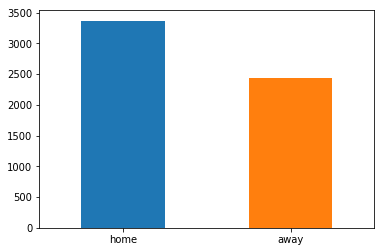

In [422]:
df['winner'].value_counts().plot(kind='bar', rot=0)

In [429]:
# Create two DataFrames: one where home is the winner, and another where away is the winner

df_home = df[df['winner']=='home']
df_away = df[df['winner']=='away']

### Rebound analysis

In [444]:
rebound_cols = [col for col in df.columns if 'rebound' in col]
home_cols = [col for col in df.columns if col.startswith('home')]
away_cols = [col for col in df.columns if col.startswith('away')]

for col1 in rebound_cols:
    for col2 in home_cols:
        if col1 != col2:
            r = pearson_r(df[col1],df[col2])
            if abs(r) >= 0.30:
                print('{} vs. {}: {}'.format(col1, col2, r))

home.statistics.defensive_rebounds vs. home.statistics.rebounds: 0.8012898739124577
home.statistics.offensive_rebounds vs. home.statistics.field_goals_att: 0.49892156212326766
home.statistics.offensive_rebounds vs. home.statistics.field_goals_pct: -0.364439066783388
home.statistics.offensive_rebounds vs. home.statistics.rebounds: 0.5643623545167588
home.statistics.offensive_rebounds vs. home.statistics.second_chance_pts: 0.661754335309933
home.statistics.offensive_rebounds vs. home.statistics.two_points_att: 0.41187280049921965
home.statistics.offensive_rebounds vs. home.statistics.two_points_pct: -0.31540177403386477
home.statistics.rebounds vs. home.statistics.defensive_rebounds: 0.8012898739124577
home.statistics.rebounds vs. home.statistics.field_goals_att: 0.4332189080064412
home.statistics.rebounds vs. home.statistics.offensive_rebounds: 0.5643623545167588
home.statistics.rebounds vs. home.statistics.second_chance_pts: 0.37805156606730694
away.statistics.defensive_rebounds vs. ho

### Assist analysis

In [445]:
assist_cols = [col for col in df.columns if 'assist' in col]

for col1 in assist_cols:
    for col2 in home_cols:
        if col1 != col2:
            r = pearson_r(df[col1],df[col2])
            if abs(r) >= 0.30:
                print('{} vs. {}: {}'.format(col1, col2, r))

home.statistics.assists vs. home.points: 0.5801130863606341
home.statistics.assists vs. home.statistics.assists_turnover_ratio: 0.5272561983252038
home.statistics.assists vs. home.statistics.field_goals_made: 0.6472153653295317
home.statistics.assists vs. home.statistics.field_goals_pct: 0.5480786014671939
home.statistics.assists vs. home.statistics.three_points_made: 0.43558608751352995
home.statistics.assists vs. home.statistics.three_points_pct: 0.37156291426300675
home.statistics.assists vs. home.statistics.two_points_made: 0.33612553677362583
home.statistics.assists vs. home.statistics.two_points_pct: 0.4502054204644319
home.statistics.assists_turnover_ratio vs. home.points: 0.34998859690006917
home.statistics.assists_turnover_ratio vs. home.statistics.assists: 0.5272561983252038
home.statistics.assists_turnover_ratio vs. home.statistics.field_goals_att: 0.3035765406670462
home.statistics.assists_turnover_ratio vs. home.statistics.field_goals_made: 0.40769667960349615
home.statist

### Points analysis

In [449]:
point_cols = [col for col in df.columns if (('points' in col)|('pts' in col))]

for col1 in point_cols:
    for col2 in home_cols:
        if col1 != col2:
            r = pearson_r(df[col1],df[col2])
            if abs(r) >= 0.30:
                print('{} vs. {}: {}'.format(col1, col2, r))

away.points vs. home.points: 0.3873103078091692
away.points vs. home.statistics.defensive_rebounds: -0.31837858901477756
away.points vs. home.statistics.field_goals_att: 0.30166694983416703
home.points vs. home.statistics.assists: 0.5801130863606341
home.points vs. home.statistics.assists_turnover_ratio: 0.3499885969000691
home.points vs. home.statistics.fast_break_pts: 0.3388408017522896
home.points vs. home.statistics.field_goals_att: 0.3025757882162205
home.points vs. home.statistics.field_goals_made: 0.8338789912616366
home.points vs. home.statistics.field_goals_pct: 0.6908484220832863
home.points vs. home.statistics.points_in_paint: 0.452966634616655
home.points vs. home.statistics.three_points_made: 0.5173802004253718
home.points vs. home.statistics.three_points_pct: 0.4572862313486874
home.points vs. home.statistics.two_points_made: 0.4637800085837279
home.points vs. home.statistics.two_points_pct: 0.5631780571371137
home.statistics.fast_break_pts vs. home.points: 0.338840801752

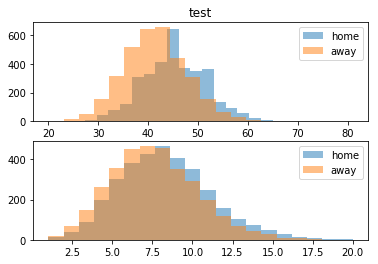

In [437]:
fig, axes = plt.subplots(2)


axes[0].hist(df_home['home.statistics.rebounds'], label='home', alpha=0.5, bins=20)
axes[0].hist(df_home['away.statistics.rebounds'], label='away', alpha=0.5, bins=20)
axes[0].legend()
axes[0].set_title('test')

axes[1].hist(df_home['home.statistics.steals'], label='home', alpha=0.5, bins=20)
axes[1].hist(df_home['away.statistics.steals'], label='away', alpha=0.5, bins=20)
axes[1].legend()
plt.show()


In [ ]:
### Find top correlations between numerical columns and home.points

# Create list of all numerical columns besides home.points

cols_to_test = [col for col in df.describe().columns]

# Initialize dictionary of key-value pairs of columns being tested and the corresponding correlation

corr_dict = {}

# Find pearson_r between every two numerical columns

for col1 in cols_to_test:
    for col2 in cols_to_test:
        
        if (col1 != col2) & ((col1,col2) not in corr_dict.keys()) & ((col2,col1) not in corr_dict.keys()):
            corr_dict[(col1,col2)] = pearson_r(df[col1], df[col2])

In [396]:
# Create a dictionary of correlations, from strongest to weakest

abs_corrs = [abs(corr) for corr in corr_dict.values()]
abs_corrs = sorted(abs_corrs, reverse=True)

strong_corrs = {k:v for corr in abs_corrs for k,v in corr_dict.items() if (abs(v) == corr) & }
strong_corrs

{('home.statistics.free_throws_att',
  'home.statistics.free_throws_made'): 0.9265303472658148,
 ('away.statistics.free_throws_att',
  'away.statistics.free_throws_made'): 0.9213258717923427,
 ('home.statistics.field_goals_pct',
  'home.statistics.two_points_pct'): 0.8392046540421734,
 ('away.statistics.field_goals_pct',
  'away.statistics.two_points_pct'): 0.8387033170463838,
 ('away.points', 'away.statistics.field_goals_made'): 0.8346955626601243,
 ('home.points', 'home.statistics.field_goals_made'): 0.8338789912616366,
 ('away.statistics.defensive_rebounds',
  'away.statistics.rebounds'): 0.8058893038215339,
 ('home.statistics.free_throws_att',
  'away.statistics.personal_fouls'): 0.8031394891193376,
 ('home.statistics.defensive_rebounds',
  'home.statistics.rebounds'): 0.8012898739124577,
 ('home.statistics.personal_fouls',
  'away.statistics.free_throws_att'): 0.7933385739280735,
 ('home.statistics.field_goals_made',
  'home.statistics.field_goals_pct'): 0.763992898241759,
 ('away

In [398]:
pearson_r(df['home.statistics.two_points_pct'],df['away.statistics.two_points_pct'])

0.05110578617246263

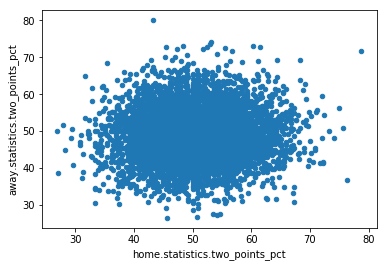

In [399]:
df.plot.scatter(x='home.statistics.two_points_pct',y='away.statistics.two_points_pct')

Text(0,0.5,'Difference in Age')

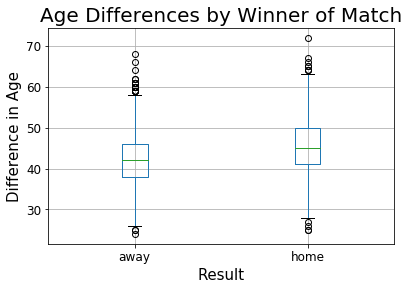

In [372]:
# Show scatterplots for the first 

df.boxplot(column = 'home.statistics.rebounds', by ='winner', fontsize=12)
plt.suptitle('')
plt.title('Rebounds of ', fontsize=20)
plt.xlabel('Result', fontsize=15)
plt.ylabel('Difference in Age', fontsize=15)

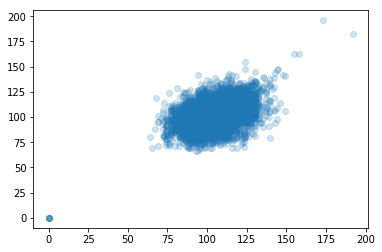

In [303]:
plt.scatter(df_all_games_new['home.points'],df_all_games_new['away.points'], alpha=0.2)
plt.show()

In [219]:
len(game_ids)

6166

In [213]:
problem_url = 'http://api.sportradar.us/nba/trial/v5/en/games/db3572c1-d778-47bd-9d9e-69368ade7ebb/summary.json?api_key=vxpszhvmgbbca574t8ue9akt'

problem_data = requests.get(problem_url)

In [214]:
problem_data.json()

{'id': 'db3572c1-d778-47bd-9d9e-69368ade7ebb',
 'status': 'closed',
 'coverage': 'full',
 'neutral_site': False,
 'scheduled': '2014-02-04T00:00:00+00:00',
 'duration': '2:03',
 'attendance': 13259,
 'lead_changes': 3,
 'times_tied': 4,
 'clock': '00:00',
 'quarter': 4,
 'track_on_court': False,
 'entry_mode': 'LDE',
 'sr_id': 'sr:match:4194647',
 'venue': {'id': 'f62d5b49-d646-56e9-ba60-a875a00830f8',
  'name': 'Capital One Arena',
  'capacity': 20356,
  'address': '601 F St. N.W.',
  'city': 'Washington',
  'state': 'DC',
  'zip': '20004',
  'country': 'USA'},
 'home': {'name': 'Wizards',
  'market': 'Washington',
  'id': '583ec8d4-fb46-11e1-82cb-f4ce4684ea4c',
  'points': 100,
  'sr_id': 'sr:team:3431',
  'scoring': [{'type': 'quarter', 'number': 1, 'sequence': 1, 'points': 32},
   {'type': 'quarter', 'number': 2, 'sequence': 2, 'points': 24},
   {'type': 'quarter', 'number': 3, 'sequence': 3, 'points': 26},
   {'type': 'quarter', 'number': 4, 'sequence': 4, 'points': 18}],
  'stati

In [163]:
json.dumps(problem_data_json)

'{"id": "8485ac65-dbdb-4ab0-9620-dbba376595a9", "status": "closed", "coverage": "full", "scheduled": "2013-11-01T23:30:00+00:00", "duration": "2:12", "attendance": 18118, "lead_changes": 21, "times_tied": 3, "clock": "00:00", "quarter": 4, "sr_id": "sr:match:4192167", "venue": {"id": "fd21f639-8a47-51ac-a5dd-590629d445cf", "name": "Philips Arena", "capacity": 18047, "address": "One Philips Drive", "city": "Atlanta", "state": "GA", "zip": "30303", "country": "USA", "sr_id": "sr:venue:6916"}, "home": {"name": "Hawks", "market": "Atlanta", "id": "583ecb8f-fb46-11e1-82cb-f4ce4684ea4c", "points": 102, "sr_id": "sr:team:3423", "scoring": [{"type": "quarter", "number": 1, "sequence": 1, "points": 25}, {"type": "quarter", "number": 2, "sequence": 2, "points": 24}, {"type": "quarter", "number": 3, "sequence": 3, "points": 30}, {"type": "quarter", "number": 4, "sequence": 4, "points": 23}], "statistics": {"minutes": "4:00:00", "field_goals_made": 36, "field_goals_att": 77, "field_goals_pct": 46.

In [109]:
# Solution for filling "None" values

json_normalize(json.loads(json.dumps(data).replace("null", '0')))

,attendance,away.id,away.market,away.name,away.players,away.points,away.scoring,away.sr_id,away.statistics.assists,away.statistics.assists_turnover_ratio,...,times_tied,venue.address,venue.capacity,venue.city,venue.country,venue.id,venue.name,venue.sr_id,venue.state,venue.zip
0,18118,583ecda6-fb46-11e1-82cb-f4ce4684ea4c,Toronto,Raptors,"[{'full_name': 'Dwight Buycks', 'jersey_number...",95,"[{'type': 'quarter', 'number': 1, 'sequence': ...",sr:team:3433,15,1.25,...,3,One Philips Drive,18047,Atlanta,USA,fd21f639-8a47-51ac-a5dd-590629d445cf,Philips Arena,sr:venue:6916,GA,30303


In [22]:
player_url = 'http://api.sportradar.us/nba/trial/v5/en/players/11da94f7-02c0-4bc9-9da3-8e8994f46fb6/profile.json?api_key=vxpszhvmgbbca574t8ue9akt'

player_json = requests.get(player_url).json()


In [23]:
player_json

{'id': '11da94f7-02c0-4bc9-9da3-8e8994f46fb6',
 'status': 'ACT',
 'full_name': 'Gerald Green',
 'first_name': 'Gerald',
 'last_name': 'Green',
 'abbr_name': 'G.Green',
 'height': 79,
 'weight': 205,
 'position': 'G-F',
 'primary_position': 'SG',
 'jersey_number': '14',
 'experience': '11',
 'high_school': 'Gulf Shores Aca. (TX)',
 'birth_place': 'Houston, TX, USA',
 'birthdate': '1986-01-26',
 'updated': '2018-09-07T18:29:57+00:00',
 'sr_id': 'sr:player:608118',
 'reference': '101123',
 'league': {'id': '4353138d-4c22-4396-95d8-5f587d2df25c',
  'name': 'NBA',
  'alias': 'NBA'},
 'team': {'id': '583ecb3a-fb46-11e1-82cb-f4ce4684ea4c',
  'name': 'Rockets',
  'market': 'Houston',
  'alias': 'HOU',
  'sr_id': 'sr:team:3412',
  'reference': '1610612745'},
 'draft': {'team_id': '583eccfa-fb46-11e1-82cb-f4ce4684ea4c',
  'year': 2005,
  'round': '1',
  'pick': '18'},
 'seasons': [{'id': '47c9979e-5c3f-453d-ac75-734d17412e3f',
   'year': 2018,
   'type': 'REG',
   'teams': [{'id': '583ecb3a-fb46

In [389]:
x = [{'name':'taylor', 'age':27}, {'name': 'amanda', 'age':26, 'sex':'f'}]
pd.DataFrame(x)

,age,name,sex
0,27,taylor,NaN
1,26,amanda,f


In [391]:
x['test'] = x['age'].apply(lambda x: x*100 if x==27 else x)
x['test']

TypeError: list indices must be integers or slices, not str

In [326]:
x[x==27]

{'name': 'taylor', 'age': 27}

In [259]:
y = ['taylor',
    'amanda']

y

['taylor', 'amanda']

In [321]:
print(2)

2


In [322]:
y

['taylor', 'amanda']

In [446]:
x = 'hello'

In [448]:
['he','hi'] in x

TypeError: 'in <string>' requires string as left operand, not list